
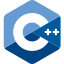
<br>

<div style="text-align:center; font-size:200%;">
  <b>What are Good Tests?</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 03 What are Good Tests.ipynb -->
<!-- slides/module_410_unit_testing/topic_130_good_tests.cpp -->


<img src="img/velocity-tests-03.png"
     alt="Velocity vs. Tests 3"
     style="width: 75%; margin-left: auto; margin-right: auto;"/>


<ul>
<li class="fragment">Shows many errors/regressions in the Code</li>
<li class="fragment">Is robust, easy to maintain and understand</li>
<li class="fragment"><b>Is insensitive to refactoring</b></li>
<li class="fragment">Gives fast feedback</li>
<li class="fragment">Is deterministic</li>
</ul>

<p class="fragment">
  Unfortunately, these properties are often in conflict with each
  other!
</p>


## Showing errors/regressions

### Influences

<ul>
  <li class="fragment">Amount of code covered</li>
  <li class="fragment">Complexity of code covered</li>
  <li class="fragment">Interaction with external systems</li>
  <li class="fragment">Significance of code covered for the domain/system</li>
</ul>

In [ ]:
#include <iostream>
#include <string>

In [ ]:
class Item
{
private:
    std::string name;
    double price; // always positive

public:
    Item(std::string name, double price) : name{name} { setPrice(price); }

    std::string getName() const { return name; }

    double getPrice() const { return price; }
    void setPrice(double value);
};

In [ ]:
void Item::setPrice(double value)
{
    if (value < 0)
    {
        value = -value;
    }
    price = value;
}

In [ ]:
namespace std
{
std::ostream& operator<<(std::ostream& os, const Item& item)
{
    os << "Item(" << item.getName() << ", " << item.getPrice() << ")";
    return os;
}
} // namespace std

In [ ]:
#include <initializer_list>
#include <vector>

In [ ]:
class Order
{
private:
    std::vector<Item> items;

public:
    Order(std::initializer_list<Item> itemList) : items{itemList} {}

    std::vector<Item> getItems() const { return items; }
    double getTotal() const;
};

In [ ]:
#include <numeric>

In [ ]:
double Order::getTotal() const
{
    return std::accumulate(
        items.begin(), items.end(), 0.0,
        [](double sum, const Item& item) { return sum + item.getPrice(); }
    );
}

In [ ]:
namespace std
{
std::ostream& operator<<(std::ostream& os, const Order& order)
{
    os << "Order(";
    std::string sep{""};
    for (const auto& item : order.getItems())
    {
        os << sep << item;
        sep = ", ";
    }
    os << "), total = " << order.getTotal();
    return os;
}
} // namespace std

In [ ]:
#include <iostream>

In [ ]:
void check(bool condition, std::string message = "Test failed!")
{
    if (!condition)
    {
        std::cerr << message << "\n";
    }
}

In [ ]:
void testItemName()
{
    Item unit{"Apple", 1.0};

    check(unit.getName() == "Apple");
    std::cout << "Success.\n";
}

In [ ]:
testItemName();

In [ ]:
void testOrderTotal()
{
    Order unit{
        {"Apple", 1.0},
        {"Banana", -2.0},
    };

    double total{unit.getTotal()};

    check(total == 3.0);
    std::cout << "Success!\n";
}

In [ ]:
testOrderTotal();

In [ ]:
#include <sstream>

In [ ]:
void testOrderOutput()
{
    Order unit{
        {"Apple", 1.0},
        {"Banana", -2.0},
    };
    std::stringstream ss;

    ss << unit;

    check(ss.str() == "Order(Item(Apple, 1), Item(Banana, 2)), total = 3");
    std::cout << "Success!\n";
}

In [ ]:
testOrderOutput();


## Easy to maintain

<ul>
  <li>Simple, standardized structure
    <table style="display:inline;margin:20px 20px;">
    <tr><td style="text-align:left;width:60px;padding-left:15px;">Arrange</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid black;">Given</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px solid black;">
          Prepare the test environment</td></tr>
    <tr><td style="text-align:left;padding-left:15px;">Act</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid black;">
           When</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px solid black;">
           Execute the action for the test (if any)</td></tr>
    <tr><td style="text-align:left;padding-left:15px;">Assert</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid black;">
           Then</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px solid black;">
           Check the results of the action/setup</td></tr>
    </table>
  </li>
  <li>Little code
    <ul>
      <li>Little boilerplate</li>
      <li>Factories, etc. for tests</li>
    </ul>
  </li>
</ul>


## Insensitive to refactoring

- Few false positives!
- Typically present or not, few intermediate stages

### Influences

- Relation to domain/system
- Access to internal structures

In [ ]:
#define private public

In [ ]:
class VeryPrivate
{
private:
    int secret{42};
};

In [ ]:
#undef private

In [ ]:
void testVeryPrivate()
{
    VeryPrivate unit;

    check(unit.secret == 42);
    std::cout << "Success!\n";
}

In [ ]:
testVeryPrivate();


## Fast feedback

### Influences

- Amount of code covered
- Complexity/number of iterations of code covered
- Interaction with external systems


## Deterministic

<ul>
  <li class="fragment">Same code always leads to the same result</li>
  <li class="fragment">Reasons for non-determinism
    <ul>
      <li class="fragment">Random numbers</li>
      <li class="fragment">Time/date</li>
      <li class="fragment">Interaction with external systems</li>
      <li class="fragment">Uninitialized variables</li>
      <li class="fragment">Communication between tests</li>
    </ul>
  </li>
  <li class="fragment">
     Tests that produce false warnings are not helpful but harmful!
  </li>
<ul>

In [ ]:
#include <iostream>
#include <string>
#include <chrono>
#include <ctime>

In [ ]:
std::string getCurrentDateAsString() {
    auto now = std::chrono::system_clock::now();
    std::time_t currentTime = std::chrono::system_clock::to_time_t(now);
    std::tm* localTime = std::localtime(&currentTime);
    char buffer[80];
    std::strftime(buffer, sizeof(buffer), "%Y-%m-%d", localTime);

    return std::string(buffer);
}

In [ ]:
void testDateBad()
{
    check(getCurrentDateAsString() == "2025-06-23");
    std::cout << "Success!\n";
}

In [ ]:
testDateBad();


### Split functionality

In [ ]:
std::string formatDateAsString(const std::chrono::system_clock::time_point& timePoint) {
    std::time_t time = std::chrono::system_clock::to_time_t(timePoint);
    std::tm* localTime = std::localtime(&time);
    char buffer[80];
    std::strftime(buffer, sizeof(buffer), "%Y-%m-%d", localTime);
    return std::string(buffer);
}

In [ ]:
std::string getCurrentDateAsStringBetter() {
    return formatDateAsString(std::chrono::system_clock::now());
}


### Better test

In [ ]:
constexpr int testDate{1750000000}; // 2025-06-15 in seconds since epoch

In [ ]:
const std::chrono::system_clock::time_point fixedTime{
        std::chrono::system_clock::from_time_t(testDate)
}; // 2025-06-15 as time_point

In [ ]:
const std::string expectedDateString{"2025-06-15"};

In [ ]:
std::cout << formatDateAsString(fixedTime);

In [ ]:
void testDateBetter()
{
    check(formatDateAsString(fixedTime) == expectedDateString);
    std::cout << "Success!\n";
}

In [ ]:
testDateBetter();

In [ ]:
std::string formatDateTimeAsString(const std::chrono::system_clock::time_point& timePoint) {
    std::time_t time = std::chrono::system_clock::to_time_t(timePoint);
    std::tm* localTime = std::localtime(&time);
    char buffer[80];
    std::strftime(buffer, sizeof(buffer), "%Y-%m-%d %H:%M:%S", localTime);
    return std::string(buffer);
}

In [ ]:
const std::string expectedDateTimeString{"2025-06-15 15:06:40"};

In [ ]:
formatDateTimeAsString(std::chrono::system_clock::now())

In [ ]:
formatDateTimeAsString(fixedTime)

In [ ]:
void testDateTime()
{
    check(formatDateTimeAsString(fixedTime) == expectedDateTimeString);
    std::cout << "Success!\n";
}

In [ ]:
testDateTime()


The following influences are in conflict with each other:

- Detecting errors/regressions
- Fast feedback
- Insensitive to refactoring

The quality of a test depends on the *product* of these factors!


## How do we find the trade-off?

- Insensitive to refactoring can *never* be sacrificed
- So we have to find a compromise between
  - Detecting errors/regressions
  - Fast feedback

### Typically

- Fast feedback for most tests (unit tests)
- Thorough error detection for fewer tests (integration tests)